In [1]:
import pandas as pd

In [2]:
data_path = '/Users/jk1/temp/opsum_preprocessed_ehr_data/gsu_prepro_01012023_233050/preprocessed_features_01012023_233050.csv'
outcome_data_path = '/Users/jk1/temp/opsum_preprocessed_ehr_data/gsu_prepro_01012023_233050/preprocessed_outcomes_01012023_233050.csv'

In [3]:
data_df = pd.read_csv(data_path)
outcome_df = pd.read_csv(outcome_data_path)

In [4]:
data_df.head()

Unnamed: 0  relative_sample_date_hourly_cat case_admission_id sample_label  \
0           0                                0       100023_4784         ALAT   
1           1                                1       100023_4784         ALAT   
2           2                                2       100023_4784         ALAT   
3           3                                3       100023_4784         ALAT   
4           4                                4       100023_4784         ALAT   

                         source     value  
0               EHR_pop_imputed -0.162694  
1  EHR_pop_imputed_locf_imputed -0.162694  
2                           EHR -0.300829  
3              EHR_locf_imputed -0.300829  
4              EHR_locf_imputed -0.300829

In [5]:
outcome_df.head()

Unnamed: 0 case_admission_id Symptomatic ICH  Symptomatic ICH date  \
0           3       100503_0884              no                   NaN   
1           5      1005564_4109              no                   NaN   
2           6      1005798_9217              no                   NaN   
3          11      1011794_0030              no                   NaN   
4          13      1012915_7747              no                   NaN   

  Recurrent stroke  Recurrent stroke date Orolingual angioedema  \
0               no                    NaN                   NaN   
1               no                    NaN                   NaN   
2               no                    NaN                   NaN   
3               no                    NaN                   NaN   
4               no                    NaN                   NaN   

   Death in hospital  Death at hospital date Death at hospital time  ...  \
0                0.0                     NaN                    NaN  ...   
1                0.0                     NaN                    NaN  ...   
2                0.0                     NaN                    NaN  ...   
3                1.0              20180201.0                  01:00  ...   
4                0.0                     NaN                    NaN  ...   

  3M ICH 3M ICH date  3M Death 3M Death date  3M Death cause  \
0     no         NaN       0.0           NaN             NaN   
1     no         NaN       0.0           NaN             NaN   
2     no         NaN       0.0           NaN             NaN   
3    NaN         NaN       1.0           NaN             NaN   
4     no         NaN       0.0           NaN             NaN   

  3M Epileptic seizure  3M Epileptic seizure date 3M delta mRS  3M mRS 0-1  \
0                  NaN                        NaN          0.0         0.0   
1                   no                        NaN          2.0         0.0   
2                   no                        NaN          1.0         1.0   
3                  NaN                        NaN          6.0         0.0   
4                   no                        NaN          0.0         1.0   

  3M mRS 0-2  
0        0.0  
1        1.0  
2        1.0  
3        0.0  
4        1.0  

[5 rows x 45 columns]

<AxesSubplot:>

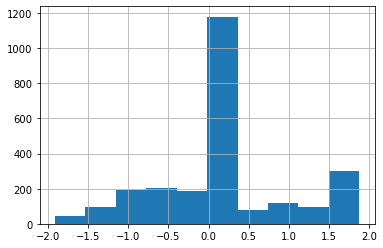

In [6]:
data_df[(data_df.sample_label == 'lactate') & (data_df.relative_sample_date_hourly_cat == 0)].value.hist()

In [7]:
lactate_df = data_df[(data_df.sample_label == 'lactate')]

In [8]:
lactate_df = lactate_df.merge(outcome_df[['case_admission_id', '3M mRS']], on='case_admission_id', how='left')

In [9]:
first_lactate_df = lactate_df[lactate_df.relative_sample_date_hourly_cat == 0]
lactate_day2_df = lactate_df[(lactate_df.relative_sample_date_hourly_cat >= 24) & (lactate_df.relative_sample_date_hourly_cat < 48)]

<AxesSubplot:xlabel='relative_sample_date_hourly_cat', ylabel='value'>

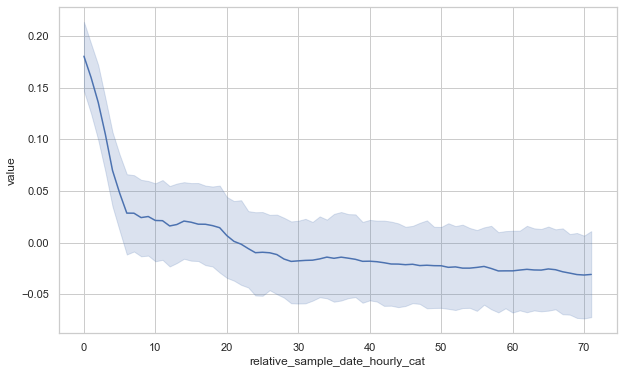

In [10]:
# lactate over_time regplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='relative_sample_date_hourly_cat', y='value', data=lactate_df)


<AxesSubplot:xlabel='3M mRS', ylabel='value'>

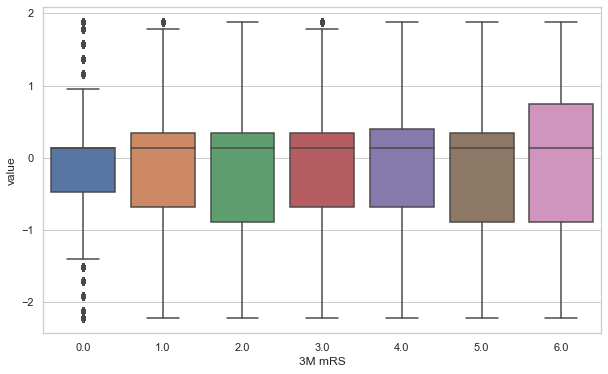

In [11]:
# scatterplot value vs 3M mRS
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=lactate_day2_df, y='value', x='3M mRS')


In [12]:
# pearons correlation between value and 3M mRS 
from scipy.stats import pearsonr
temp_df = first_lactate_df.dropna(subset=['value', '3M mRS'])
corr, p_value = pearsonr(temp_df['value'], temp_df['3M mRS'])
print(f'Pearson correlation: {corr}, p-value: {p_value}')

Pearson correlation: 0.04966318151405835, p-value: 0.018531292759635245


In [ ]:
temp_df = first_lactate_df.dropna(subset=['value', '3M mRS'])
corr, p_value = pearsonr(temp_df['value'], temp_df['3M mRS'])
print(f'Pearson correlation: {corr}, p-value: {p_value}')